Real Parameters: [10, 0.34, 0.5235987755982988]
Regression Parameters [ 9.88051505  0.34159918 -5.73497849]


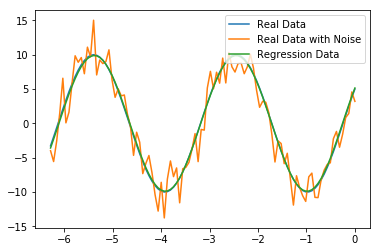

In [10]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def func(x, p):
    """
    Function to generate raw data: A*sin(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)

def residuals(p, y, x):
    return y - func(x, p)

x = np.linspace(0, -2*np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6
y0 = func(x, [A, k, theta])
y1 = y0 + 2 * np.random.randn(len(x))

p0 = [7, 0.2, 0]

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1, x))

print("Real Parameters:", [A, k, theta])
print("Regression Parameters", plsq[0]) # 实验数据拟合后的参数

plt.plot(x, y0, label="Real Data")
plt.plot(x, y1, label="Real Data with Noise")
plt.plot(x, func(x, plsq[0]), label="Regression Data")
plt.legend()
plt.show()